<a href="https://colab.research.google.com/github/gyimesbalint/DL_project/blob/main/fitting_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing datasets

In [ ]:
# https://drive.google.com/file/d/1pmNSD1nbYHEAiP065s4akRXHMWFs9Dqw/view?usp=sharing DBpedia train.csv
# https://drive.google.com/file/d/1mKededzdbJsWQnwsu-R_WSILYSvNEY7c/view?usp=sharing DBpedia test.csv
!pip install gdown
!gdown --id 1pmNSD1nbYHEAiP065s4akRXHMWFs9Dqw --output train.csv  #import train.csv from drive
!gdown --id 1mKededzdbJsWQnwsu-R_WSILYSvNEY7c --output test.csv   #import test.csv from drive

Downloading...
From: https://drive.google.com/uc?id=1pmNSD1nbYHEAiP065s4akRXHMWFs9Dqw
To: /content/train.csv
100% 174M/174M [00:01<00:00, 127MB/s]
Downloading...
From: https://drive.google.com/uc?id=1mKededzdbJsWQnwsu-R_WSILYSvNEY7c
To: /content/test.csv
100% 21.8M/21.8M [00:00<00:00, 130MB/s] 


In [ ]:
import numpy as np
import pandas as pd

train_data = pd.read_csv('train.csv', encoding='utf8',header=None) #read csv to dataframe
test_data = pd.read_csv('test.csv', encoding='utf8',header=None)   #read csv to dataframe

train_data.where(train_data[0] < 6, inplace = True)  #select first 5 categories
train_data = train_data[train_data[0].notnull()]     #remove NaN values

test_data.where(test_data[0] < 6, inplace = True)    #select first 5 categories
test_data = test_data[test_data[0].notnull()]        #remove NaN values

In [ ]:
training_data = train_data.where(train_data[0] == 1.0)
training_data = training_data[training_data[0].notnull()]
training_data = training_data.head(len(training_data) // 5)
for i in range(2, 6):
    tmp = train_data.where(train_data[0] == (i * 1.0))
    tmp = tmp[tmp[0].notnull()]
    tmp = tmp.head(len(tmp) // 5)
    training_data = pd.concat([training_data, tmp])
train_data = training_data #reduce training_data size
train_data

,0,1,2
0,1.0,E. D. Abbott Ltd,Abbott of Farnham E D Abbott Limited was a Br...
1,1.0,Schwan-Stabilo,Schwan-STABILO is a German maker of pens for ...
2,1.0,Q-workshop,Q-workshop is a Polish company located in Poz...
3,1.0,Marvell Software Solutions Israel,Marvell Software Solutions Israel known as RA...
4,1.0,Bergan Mercy Medical Center,Bergan Mercy Medical Center is a hospital loc...
...,...,...,...
167995,5.0,Zsolt Horváth (politician 1964),Zsolt Horváth (born May 22 1964) is a Hungari...
167996,5.0,Majaliwa K. Majaliwa,Majaliwa Kassim Majaliwa (born 22 December 19...
167997,5.0,Jeanne Hulit,Jeanne A. Hulit (born 1958) served as Acting ...
167998,5.0,Peter N. Silvestri,Peter N. Silvestri is currently a member of t...


In [ ]:
testing_data = test_data.where(test_data[0] == 1.0)
testing_data = testing_data[testing_data[0].notnull()]
testing_data = testing_data.head(len(testing_data) // 5)
for i in range(2, 6):
    tmp = test_data.where(test_data[0] == (i * 1.0))
    tmp = tmp[tmp[0].notnull()]
    tmp = tmp.head(len(tmp) // 5)
    testing_data = pd.concat([testing_data, tmp])
test_data = testing_data #reduce testing_data size
test_data

,0,1,2
0,1.0,TY KU,TY KU /taɪkuː/ is an American alcoholic bever...
1,1.0,Odd Lot Entertainment,OddLot Entertainment founded in 2001 by longt...
2,1.0,Henkel,Henkel AG & Company KGaA operates worldwide w...
3,1.0,GOAT Store,The GOAT Store (Games Of All Type Store) LLC ...
4,1.0,RagWing Aircraft Designs,RagWing Aircraft Designs (also called the Rag...
...,...,...,...
20995,5.0,Annise Parker,Annise Danette Parker (born May 17 1956) is a...
20996,5.0,Taylor Townsend (politician),Thomas Taylor Townsend known as Taylor Townse...
20997,5.0,Keith B. Alexander,Keith Brian Alexander (born December 2 1951) ...
20998,5.0,Henry Hague Davis,Henry Hague Davis (September 10 1885 – June 3...


In [ ]:
train_data.sample(5) #sample from train data

,0,1,2
46570,2.0,Cony High School,Cony High School is a public school located i...
162271,5.0,Bindo Jibrilla,Bindo Umaru Jibrilla is a Nigerian businessma...
43542,2.0,Divya Deepa Charitable Trust,Divya Deepa Charitable Trust is an NGO establ...
80900,3.0,Archie Rand,Archie Rand (born 1949) is an artist from Bro...
81180,3.0,Buddy Arnold,Arnold Buddy Grishaver better known as Buddy ...


In [ ]:
test_data.sample(5) #sample from test data

,0,1,2
15968,4.0,Bake Turner,Robert Hardy Bake Turner (born July 22 1940) ...
10332,3.0,Ercole Procaccini the Elder,Ercole Procaccini the Elder (1520 – 1595) was...
556,1.0,Interstate Airlines,Interstate Airlines was a charter airline bas...
20022,5.0,Brian Sonntag,Brian Sonntag is the retired State Auditor fo...
15318,4.0,Jack Leasure,John Richard Jack Leasure (born January 29 19...


In [ ]:
train_label = pd.to_numeric(train_data.iloc[:,0]) #select labels (int) from train data
train_text = train_data.iloc[:,1:3] #select article text from train data

In [ ]:
test_label = pd.to_numeric(test_data.iloc[:,0]) #select labels (int) from test data
test_text = test_data.iloc[:,1:3] #select article text from train data

#Pre-processing

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer #vectorizer for article text data
from nltk.corpus import stopwords #stopwords for desktop usage
import nltk
nltk.download('stopwords') #stopwords for collab notebook

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
vectorizer = CountVectorizer(stop_words=stopwords.words('english'), analyzer='word', ngram_range=(1, 1)) #vectorizer for words, removing stopwords

In [ ]:
test_title = test_text.iloc[:,0] #select titles from test text
test_desc = test_text.iloc[:,1]  #select descriptions from test text

In [ ]:
train_title = train_text.iloc[:,0] #select titles from train text
train_desc = train_text.iloc[:,1]  #select descriptions from train text

In [ ]:
titles = pd.concat([test_title, train_title]) #concat titles for vectorazition
descs = pd.concat([test_desc, train_desc]) #concat descriptions for vectorazition

In [ ]:
titles = pd.DataFrame.sparse.from_spmatrix(vectorizer.fit_transform(titles)) #vectorizing test_title and adding it to a dataframe
title_feature_names = np.asarray(vectorizer.get_feature_names()) #getting all feature names for test_title
descs = pd.DataFrame.sparse.from_spmatrix(vectorizer.fit_transform(descs)) #vectorizing test_desc and adding it to a dataframe
desc_feature_names = np.asarray(vectorizer.get_feature_names()) #getting all feature names for test_desc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
titles = titles.loc[:, titles.sum(axis=0) > 8] #remove extremely rare words

In [ ]:
titles.shape

(45000, 1614)

In [ ]:
#descs = descs.loc[:, descs.sum(axis=0) > 8] #remove extremely rare words

In [ ]:
#descs.shape

In [ ]:
test_title = titles[0:len(test_title.index)] #split vectorized data
test_title.shape

(5000, 1614)

In [ ]:
#First 5 rows and feature names obtained with the vectoritzer
print(test_title[0:5])
print(title_feature_names[0:5])

   138    153    164    175    187    ...  39509  39510  39511  39539  39555
0      0      0      0      0      0  ...      0      0      0      0      0
1      0      0      0      0      0  ...      0      0      0      0      0
2      0      0      0      0      0  ...      0      0      0      0      0
3      0      0      0      0      0  ...      0      0      0      0      0
4      0      0      0      0      0  ...      0      0      0      0      0

[5 rows x 1614 columns]
['07' '0verflow' '10' '100' '1000memories']


In [ ]:
#test_desc = descs.head(len(test_desc.index))

In [ ]:
#test_desc.shape

In [ ]:
#First 5 rows and feature names obtained with the vectorizer
#print(test_desc[0:5])

In [ ]:
train_title = titles.tail(len(titles) - len(test_title)) #split vectorized data

In [ ]:
train_title.shape

(40000, 1614)

In [ ]:
#First 5 rows and feature names obtained with the vectoritzer
print(train_title[0:5])

      138    153    164    175    187    ...  39509  39510  39511  39539  39555
5000      0      0      0      0      0  ...      0      0      0      0      0
5001      0      0      0      0      0  ...      0      0      0      0      0
5002      0      0      0      0      0  ...      0      0      0      0      0
5003      0      0      0      0      0  ...      0      0      0      0      0
5004      0      0      0      0      0  ...      0      0      0      0      0

[5 rows x 1614 columns]


In [ ]:
#train_desc = descs.tail(len(descs) - len(test_desc.index))

In [ ]:
#train_desc.shape

In [ ]:
#First 5 rows and feature names obtained with the vectoritzer
#print(train_desc[0:5])

In [ ]:
from scipy.sparse import csr_matrix #for min-max scaling sparse matrices

In [ ]:
def normalize(df): #function for min-max scaling of dataframes
    result = df.copy()
    for feature_name in df.columns:
        max_value = csr_matrix(df[feature_name]).max()
        min_value = csr_matrix(df[feature_name]).min()
        result[feature_name] = (df[feature_name] - min_value) / max((max_value - min_value), 1)
    return result

In [ ]:
test_title = normalize(test_title) #min-max scale test_title

In [ ]:
print(test_title[0:5])

   138    153    164    175    187    ...  39509  39510  39511  39539  39555
0    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
1    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
2    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
3    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
4    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0

[5 rows x 1614 columns]


In [ ]:
#test_desc = normalize(test_desc) #min-max scale test_desc

In [ ]:
#print(test_desc[0:5])

In [ ]:
train_title = normalize(train_title) #min-max scale train_title

In [ ]:
print(train_title[0:5])

      138    153    164    175    187    ...  39509  39510  39511  39539  39555
5000    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
5001    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
5002    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
5003    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
5004    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0

[5 rows x 1614 columns]


In [ ]:
#train_desc = normalize(train_desc) #min-max scale train_desc

In [ ]:
#print(train_desc[0:5])

In [ ]:
input_shape = train_title.iloc[0].shape
input_shape = (input_shape[0], 1)
input_shape #get input_shape for the model

(1614, 1)

Our **X** will be the sparse matrices and the feature names from the title and the description, and **Y** will be the labels provided in the csv file.

Validation split is obtained later in the model.fit() function from training data

#Model and fitting

In [ ]:
%tensorflow_version 2.x

In [ ]:
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Activation, Dense, Flatten, Conv1D, MaxPooling1D, Dropout
#from tensorflow.keras.optimizers import SGD
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
model = keras.models.Sequential() #build model
model.add(keras.layers.Conv1D(32, 3, activation='relu', kernel_initializer='he_normal', input_shape=input_shape))
model.add(keras.layers.MaxPooling1D(pool_size=2))
model.add(keras.layers.Conv1D(16, 3, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.MaxPooling1D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy']) #compile model

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1612, 32)          128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 806, 32)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 804, 16)           1552      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 402, 16)          0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 6432)              0         
                                                                 
 dense (Dense)               (None, 16)                1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard #set up callbacks
patience=10
early_stopping=EarlyStopping(patience=patience, verbose=1)
checkpointer=ModelCheckpoint(filepath='model.hdf5', save_best_only=True, verbose=1)
tb = TensorBoard(log_dir='logs', histogram_freq=1, write_graph=1)

In [ ]:
train_title.shape

(40000, 1614)

In [ ]:
from sklearn.model_selection import train_test_split

test_size = 0.5
val_title, test_title, val_label, test_label = train_test_split(test_title, test_label, test_size=test_size) #create validation sets

In [ ]:
from tensorflow.keras.utils import Sequence, to_categorical

class DataGenerator(Sequence): #custom data generator
    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=4, dim=(input_shape[0]), n_channels=1,
                 n_classes=5, shuffle=True):
        #Initialization
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        #Denotes the number of batches per epoch
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        #Generate one batch of data
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        # Generate data
        X, y = self.__data_generation(indexes)

        return X, y

    def on_epoch_end(self):
        #Updates indexes after each epoch
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        #Generates data containing batch_size samples
        # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)
        # Generate data
        for i in range(len(list_IDs_temp)):
            # Store sample
            X[i] = self.list_IDs.iloc[list_IDs_temp[i]].to_numpy().reshape(self.dim, self.n_channels)

            # Store class
            y[i] = self.labels.iloc[list_IDs_temp[i]]

        return X, to_categorical(y - 1, num_classes=self.n_classes)

In [ ]:
train_generator = DataGenerator(train_title, train_label)

In [ ]:
s = val_title.shape
val_title = val_title.to_numpy().reshape(s[0], s[1], 1) #reshape val_title for model
print(val_title.shape)
val_label = val_label.to_numpy()
val_label = val_label - 1
val_label = to_categorical(val_label, num_classes=5) #reshape val_label from int to categorical
val_label

(2500, 1614, 1)


array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
s = test_title.shape
test_title.to_numpy().reshape(s[0], s[1], 1) #reshape test_title
print(test_title.shape)
test_label = test_label.to_numpy()
test_label = test_label - 1
test_label = to_categorical(test_label, num_classes=5) #reshape test_label from int to categorical
test_label

(2500, 1614)


array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
#train model
network_history = model.fit(train_generator, validation_data=(val_title, val_label), epochs=30,steps_per_epoch=250, verbose=1, callbacks=[early_stopping, checkpointer, tb])

Epoch 1/30
250/250 [==============================] - ETA: 0s - loss: 1.3908 - accuracy: 0.3450
Epoch 00001: val_loss improved from inf to 1.17053, saving model to model.hdf5
250/250 [==============================] - 53s 163ms/step - loss: 1.3908 - accuracy: 0.3450 - val_loss: 1.1705 - val_accuracy: 0.4428
Epoch 2/30
250/250 [==============================] - ETA: 0s - loss: 1.2030 - accuracy: 0.4560
Epoch 00002: val_loss improved from 1.17053 to 1.16130, saving model to model.hdf5
250/250 [==============================] - 39s 155ms/step - loss: 1.2030 - accuracy: 0.4560 - val_loss: 1.1613 - val_accuracy: 0.4588
Epoch 3/30
250/250 [==============================] - ETA: 0s - loss: 1.1890 - accuracy: 0.4460
Epoch 00003: val_loss improved from 1.16130 to 1.09767, saving model to model.hdf5
250/250 [==============================] - 39s 154ms/step - loss: 1.1890 - accuracy: 0.4460 - val_loss: 1.0977 - val_accuracy: 0.4924
Epoch 4/30
250/250 [==============================] - ETA: 0s - l

# Evaluation

In [ ]:
from keras.models import load_model
model = load_model("model.hdf5")
test_err = model.evaluate(test_title, test_label)
print("Test error:", test_err[0], "Teszt accuracy:", test_err[1])

79/79 [==============================] - 1s 5ms/step - loss: 0.9133 - accuracy: 0.5560
Test error: 0.9132648706436157 Teszt accuracy: 0.5559999942779541


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix
# get predictions
y_pred = model.predict(test_title)
y_pred = np.argmax(y_pred,1)
y_true = np.argmax(test_label,1)

print("test accuracy: %g" %(accuracy_score(y_true, y_pred)))
print("Precision", precision_score(y_true, y_pred, average="macro"))
print("Recall", recall_score(y_true, y_pred, average="macro"))
print("f1_score", f1_score(y_true, y_pred, average="macro"))
print("\nConfusion matrix: ")
conf=confusion_matrix(y_true, y_pred)
print(conf)

test accuracy: 0.556
Precision 0.6313002250998218
Recall 0.5557763479768157
f1_score 0.5558056824246387

Konfúziós mátrix: 
[[268   7  16 205   9]
 [ 12 470   2  16   5]
 [ 10   0  93 312  82]
 [ 11   1  57 361  60]
 [ 10   0  45 250 198]]


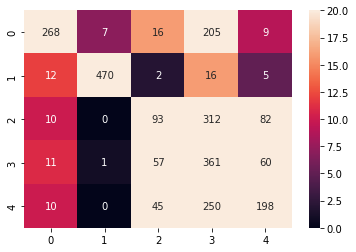

In [ ]:
import seaborn as sns
sns.heatmap(conf, annot=True, fmt='d', vmax=20) # get heatmap